In [62]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

import pandas_profiling as pp
from pandas_profiling import ProfileReport

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC


In [2]:
credit = pd.read_csv('cc_default.csv', skiprows=1)


In [3]:
credit['default'] = credit['default payment next month']
credit = credit.drop(['ID', 'default payment next month'], axis=1)
credit = credit.drop_duplicates()
nulls = credit.isnull().sum()
nulls

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [4]:
credit.dtypes

LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default      object
dtype: object

In [28]:
credit['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [5]:
#SEX needs to be a number
#use the encoder
le = LabelEncoder()
le.fit(credit['SEX'])
credit['SEX'] = le.transform(credit['SEX'])

In [90]:
credit['default'].describe()

count           29965
unique              2
top       not default
freq            23335
Name: default, dtype: object

In [6]:
#default needs to be a number
#use the encoder
le = LabelEncoder()
le.fit(credit['default'])
credit['default'] = le.transform(credit['default'])

In [7]:
credit.dtypes

LIMIT_BAL     int64
SEX           int32
EDUCATION    object
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int32
dtype: object

In [8]:
credit = pd.get_dummies(credit)

In [9]:
credit.dtypes

LIMIT_BAL                    int64
SEX                          int32
MARRIAGE                     int64
AGE                          int64
PAY_0                        int64
PAY_2                        int64
PAY_3                        int64
PAY_4                        int64
PAY_5                        int64
PAY_6                        int64
BILL_AMT1                    int64
BILL_AMT2                    int64
BILL_AMT3                    int64
BILL_AMT4                    int64
BILL_AMT5                    int64
BILL_AMT6                    int64
PAY_AMT1                     int64
PAY_AMT2                     int64
PAY_AMT3                     int64
PAY_AMT4                     int64
PAY_AMT5                     int64
PAY_AMT6                     int64
default                      int32
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
dtype: object

In [95]:
credit.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438,...,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846
std,129760.135222,0.489128,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090,...,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#If left alone a regression problem will treat the negative numbers worse than the positives. But they are
#a good thing...-2 = no consumption & -1 = paid in full...the algorithm doesn't need the negatives
credit['PAY_0'] = credit['PAY_0'].replace(-2,0)
credit['PAY_2'] = credit['PAY_2'].replace(-2,0)
credit['PAY_3'] = credit['PAY_3'].replace(-2,0)
credit['PAY_4'] = credit['PAY_4'].replace(-2,0)
credit['PAY_5'] = credit['PAY_5'].replace(-2,0)
credit['PAY_6'] = credit['PAY_6'].replace(-2,0)

credit['PAY_0'] = credit['PAY_0'].replace(-1,0)
credit['PAY_2'] = credit['PAY_2'].replace(-1,0)
credit['PAY_3'] = credit['PAY_3'].replace(-1,0)
credit['PAY_4'] = credit['PAY_4'].replace(-1,0)
credit['PAY_5'] = credit['PAY_5'].replace(-1,0)
credit['PAY_6'] = credit['PAY_6'].replace(-1,0)

In [11]:
credit.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,1.551877,35.487969,0.356416,0.320340,0.304288,0.258935,0.221625,0.226698,...,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846
std,129760.135222,0.489128,0.521997,9.219459,0.760752,0.802064,0.790696,0.761200,0.717768,0.715483,...,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973
min,10000.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.500000e+02,390.000000,300.000000,261.000000,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
#profile = ProfileReport(credit, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [70]:
#profile = pp.ProfileReport(credit)

In [12]:
#profile.to_file(output_file="EDA.html")
cols = list(credit.columns.values) #Make a list of all of the columns in the df
cols.insert(26, cols.pop(cols.index('default')))
credit = credit[cols] #Create new dataframe with columns in the order you want

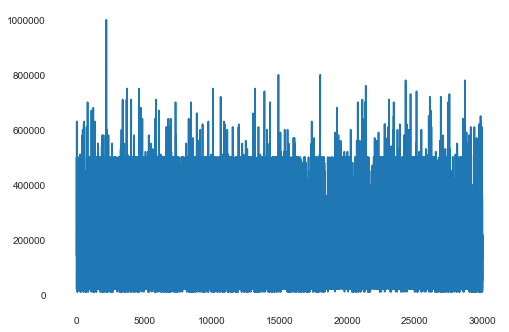

In [99]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

Text(0, 0.5, 'july')

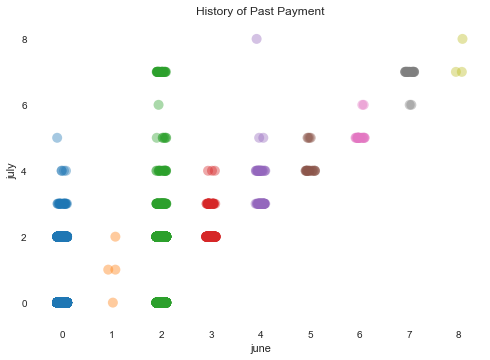

In [19]:

x = credit['PAY_3']
y = credit['PAY_4']
sn.stripplot(x,y,s=10,alpha=0.4,jitter=True,edgecolor='none')
sn.despine()
plt.title('History of Past Payment')
plt.xlabel('june')
plt.ylabel('july')

In [40]:
#credit.groupby('EDUCATION_university')['EDUCATION_university'].count()

In [41]:
#credit.groupby('EDUCATION_other')['EDUCATION_other'].count()

In [42]:
#sn.factorplot('SEX', data=credit, kind='count', aspect=1.5)

In [43]:
#credit.groupby(['SEX', 'EDUCATION_graduate school'])['SEX'].count()

In [44]:
#credit.groupby(['SEX', 'EDUCATION_university'])['SEX'].count()

In [45]:
#credit.groupby(['SEX', 'EDUCATION_high school'])['SEX'].count()

In [46]:
#credit.groupby(['SEX', 'EDUCATION_other'])['SEX'].count()

In [47]:
#credit.groupby('EDUCATION_high school')['EDUCATION_high school'].count()

In [48]:
#g = sn.factorplot('EDUCATION_graduate school', data=credit, hue='SEX', kind='count', aspect=1.75)
#g.set_xlabels('SEX')

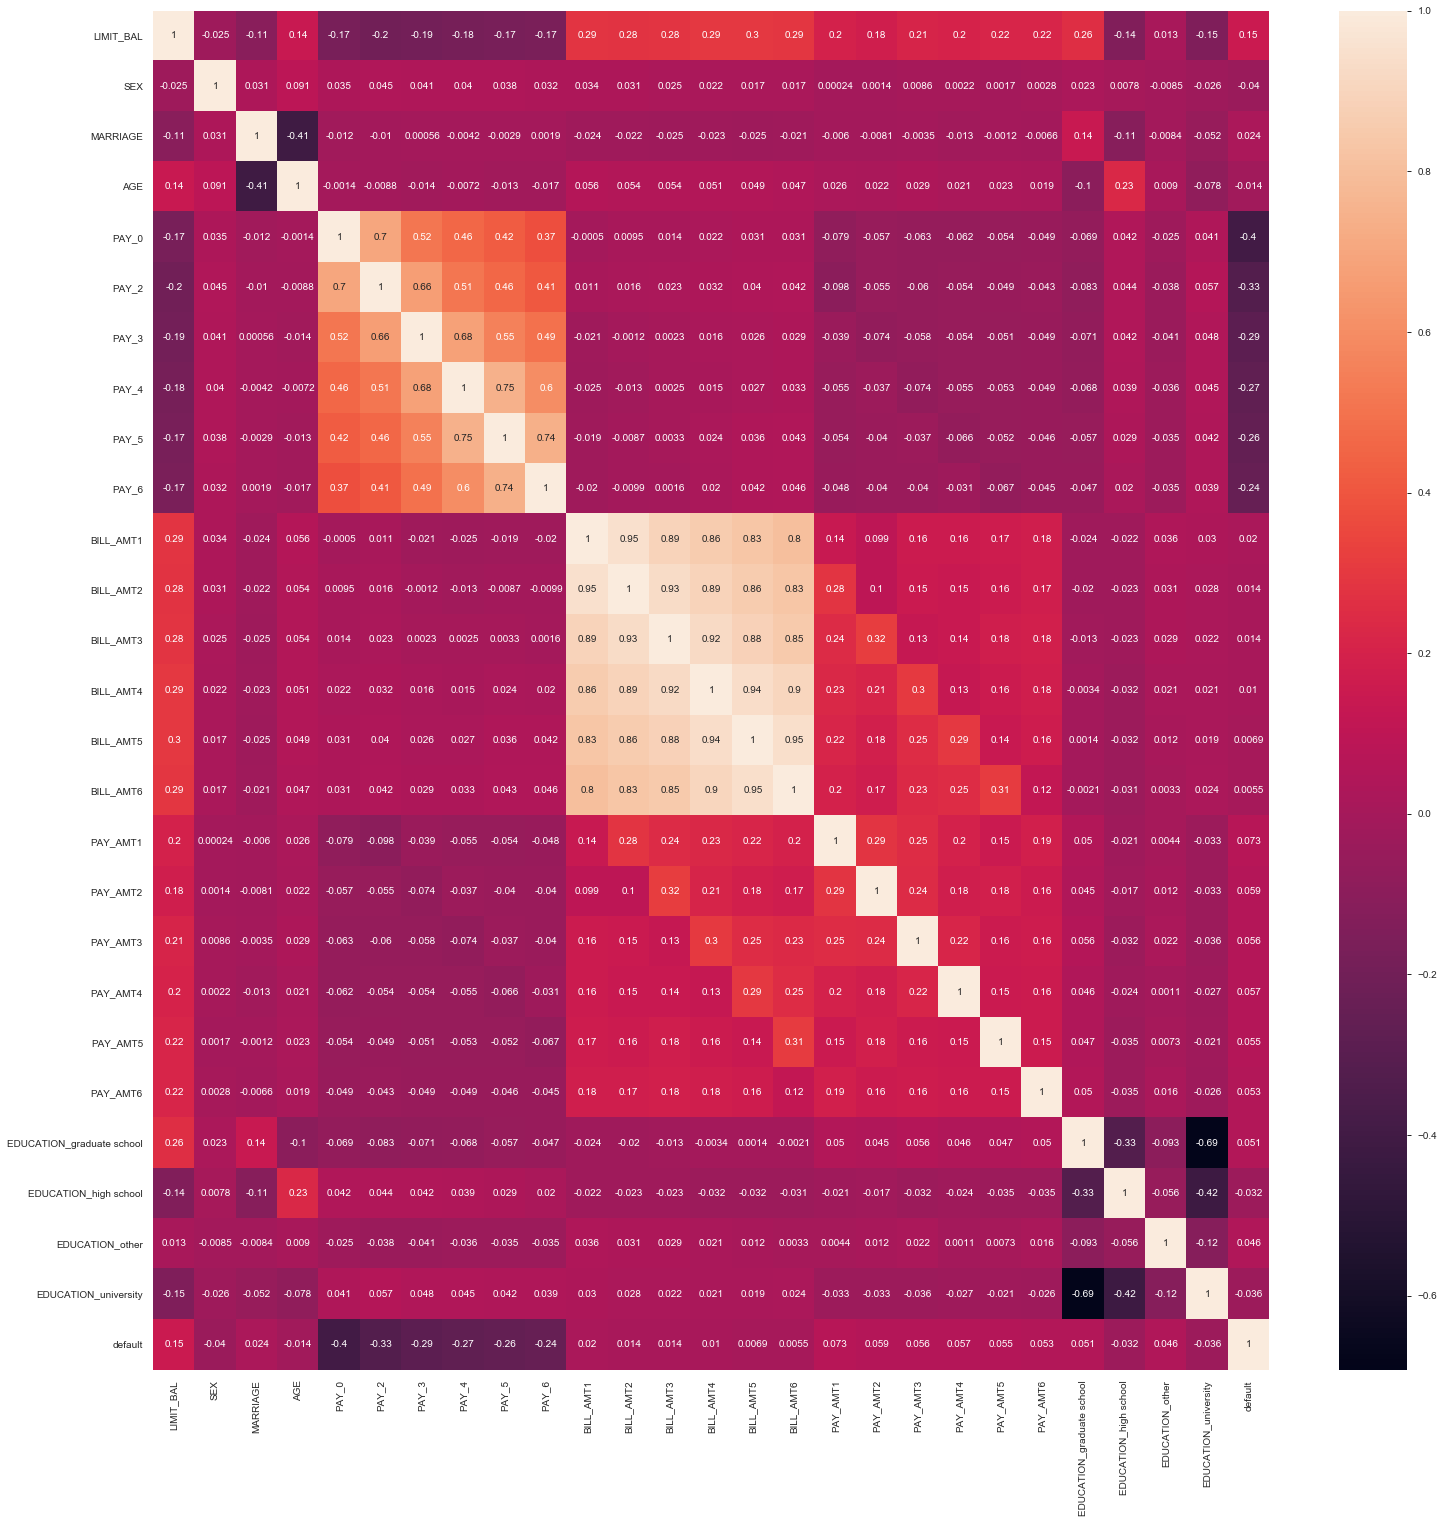

In [13]:
# THE ONLY WAY YOU CAN MAKE DECISIONS ABOUT FEATURES IS BY LOOKING AT CORRELATION WHEN TWO FEATURES ARE HIGHLY CORRELATED
# IT IS CALLED "CO-LINEARITY"
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sn.heatmap(credit_corr, annot=True)
plt.show()

In [14]:
credit = credit.drop(['SEX','MARRIAGE','EDUCATION_high school','EDUCATION_university','EDUCATION_other'], axis=1)

In [15]:
credit = credit.drop(['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)


In [16]:
credit = credit.drop(['default', 'AGE'], axis=1)

In [18]:
credit = credit.drop(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)

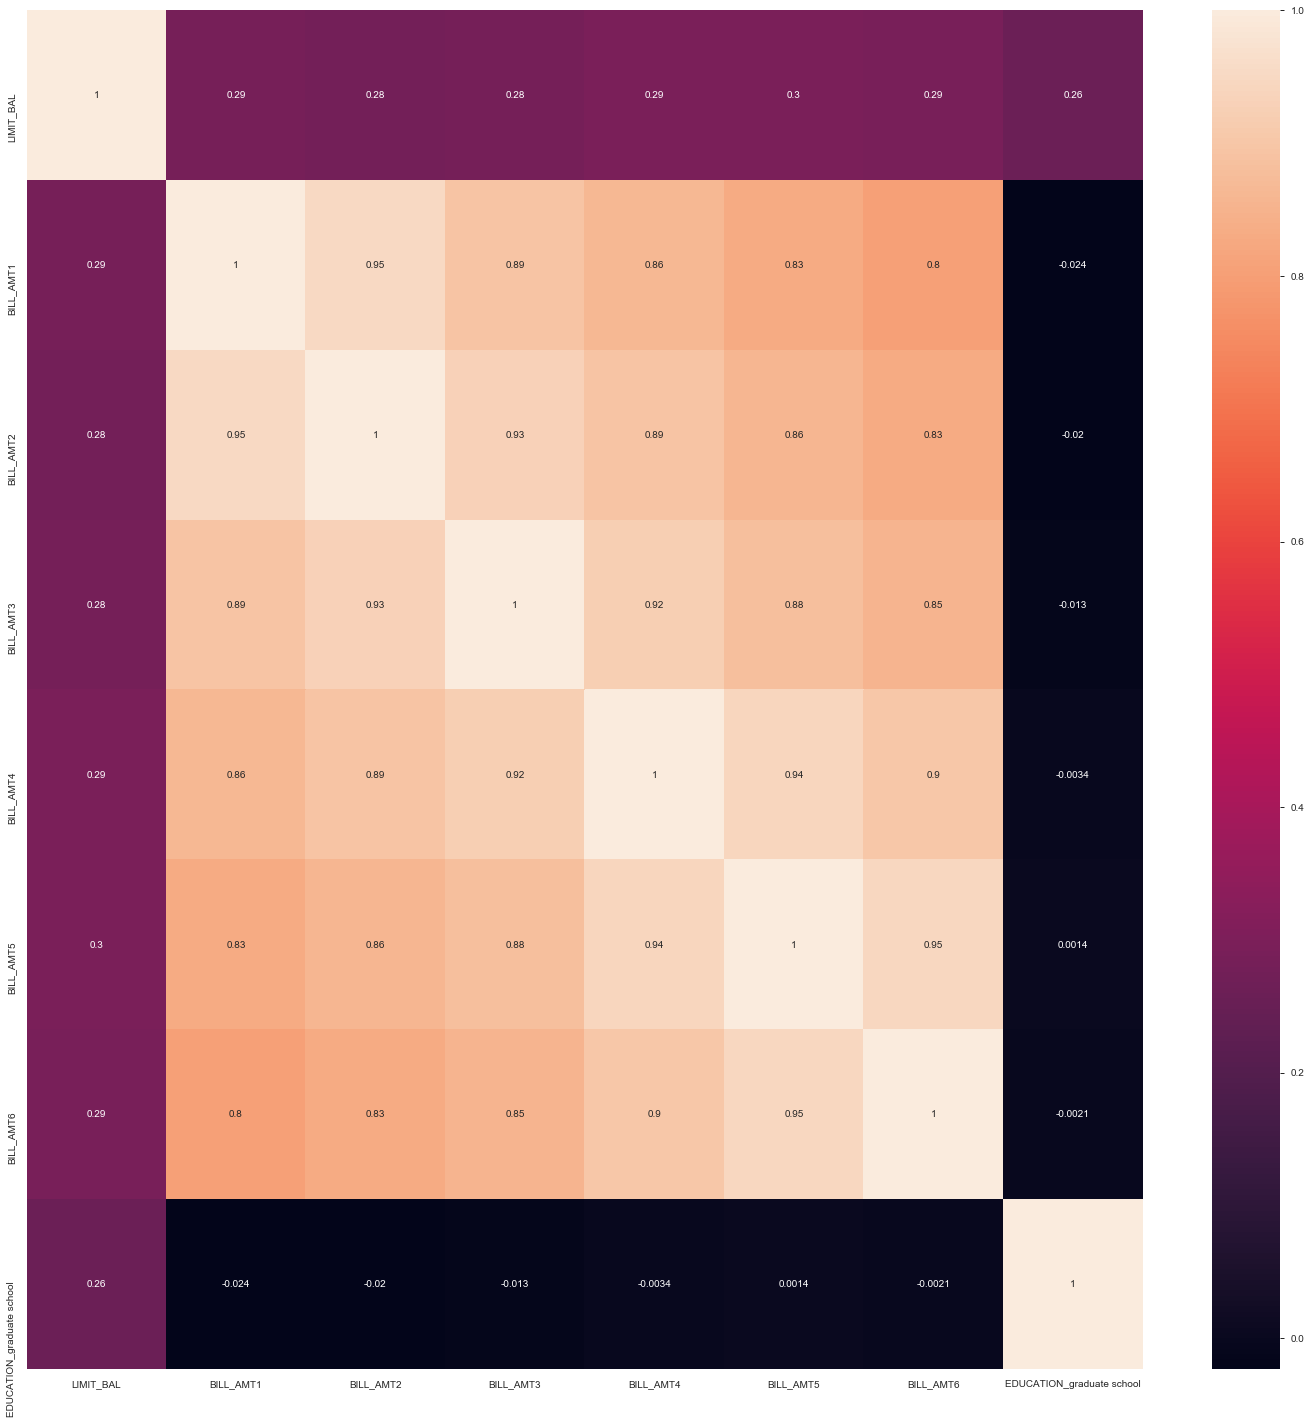

In [19]:
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sn.heatmap(credit_corr, annot=True)
plt.show()

In [65]:
#bins = [10000, 150000,490000,1000000]

In [75]:
#group_names = [0, 1, 2]

In [76]:
#credit['limit_bal_bins'] = pd.cut(credit['LIMIT_BAL'], bins, labels=group_names)

In [20]:
X = credit.iloc[: , 1:8]
print('Summary of feature sample')
X.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_graduate school
0,3913,3102,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0
2,29239,14027,13559,14331,14948,15549,0
3,46990,48233,49291,28314,28959,29547,0
4,8617,5670,35835,20940,19146,19131,0


In [21]:
y = credit['LIMIT_BAL']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33, random_state = 123)
print('Summary of feature sample')
X_train.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_graduate school
11171,67573,68884,70511,48772,27026,26056,0
28851,2500,2500,2500,2500,2500,2500,1
14192,7701,7744,6997,1386,5578,1386,1
25199,-5,565,-25,-25,4897,6685,0
20502,58340,58644,59855,61013,61097,65089,0


In [23]:
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_graduate school
11171,67573,68884,70511,48772,27026,26056,0
28851,2500,2500,2500,2500,2500,2500,1
14192,7701,7744,6997,1386,5578,1386,1
25199,-5,565,-25,-25,4897,6685,0
20502,58340,58644,59855,61013,61097,65089,0


In [24]:
y_train

11171     70000
28851    220000
14192    230000
25199     30000
20502    210000
          ...  
28666    260000
17743     80000
28059     80000
15737    400000
19983     70000
Name: LIMIT_BAL, Length: 20076, dtype: int64

In [27]:
#NORMALIZE THE DATA
n_scaler = MinMaxScaler()
X_train = n_scaler.fit_transform(X_train.astype(np.float))
X_test = n_scaler.transform(X_test.astype(np.float))

In [26]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [28]:
#model for LINEAR REGRESSION
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [29]:
#print score...R^2 scores for train and test
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))

lr.coef_: [ 389711.42878697 -197419.28160569   90632.33804366  124654.78413351
  109253.00598726  252740.08310963   71922.32584994]
lr.intercept_: -16962.956143339426
lr train score 0.164, lr test score: 0.160


In [30]:
#predictions
preds = lr.predict(X_test)
#Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: 0.160
MSE is: 14139220201.007
RMSE is: 118908.453


In [31]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures (degree = 8)
X_poly = poly.fit_transform(X)

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

In [37]:
poly_lr = LinearRegression().fit(X_train,y_train)

y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

In [38]:
print('poly train score %.3f, poly test score: %.3f' % (
poly_lr.score(X_train,y_train),
poly_lr.score(X_test, y_test)))

poly train score 0.164, poly test score: 0.160


In [47]:
svr = SVR(kernel='linear', C = 300)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0 )

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

In [50]:
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [51]:
#print score
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

svr train score 0.074, svr test score: 0.061


In [52]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0 )

In [54]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

In [55]:
forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [56]:
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

forest train score 0.886, forest test score: 0.338


In [66]:
#predictions
preds = forest.predict(X_test)
#Assessment
print('R2 Score is: %.3f' % r2_score(y_test, preds))
print('MSE is: %.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print('RMSE is: %.3f' % rms)

R2 Score is: 0.338
MSE is: 11248656810.387
RMSE is: 106059.685


In [57]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Linear Model', LinearRegression()))
algos_Class.append(('SVR',SVR() ))

In [58]:
#classification
results = []
names = []
for name, model in algos_Class:
     result = cross_val_score(model, X,y, cv=3)
     names.append(name)
     results.append(result)

C:\Users\User\Anaconda3\envs\dataScience1\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [59]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.24608736944773546
Linear Model 0.15808895331011621
SVR -0.050589169398223


In [60]:
#Function to print best hyperparamaters: 
def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()

In [63]:
param_grid_svr = dict(kernel=[ 'linear', 'poly'], degree=[2], C=[600, 700, 800, 900], epsilon=[0.0001, 0.00001, 0.000001])
svr = GridSearchCV(SVR(), param_grid=param_grid_svr, cv=5, verbose=3)

In [64]:
svr = svr.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.084, total=   5.5s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.075, total=   5.7s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.1s remaining:    0.0s


[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.079, total=   6.4s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.061, total=   6.8s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.059, total=   6.2s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.102, total=   8.2s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.100, total=   8.4s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.048, total=   7.8s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.099, total=   8.2s
[CV] C=600, deg

[CV]  C=700, degree=2, epsilon=1e-06, kernel=poly, score=0.049, total=   7.7s
[CV] C=700, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=700, degree=2, epsilon=1e-06, kernel=poly, score=0.101, total=   7.7s
[CV] C=700, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=700, degree=2, epsilon=1e-06, kernel=poly, score=0.062, total=   7.8s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.084, total=   6.2s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.074, total=   6.1s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.080, total=   6.3s
[CV] C=800, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=linear, score=0.061, total=   6.3s
[CV] C=800, degr

[CV]  C=900, degree=2, epsilon=1e-06, kernel=linear, score=0.079, total=   6.5s
[CV] C=900, degree=2, epsilon=1e-06, kernel=linear ...................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=linear, score=0.061, total=   6.4s
[CV] C=900, degree=2, epsilon=1e-06, kernel=linear ...................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=linear, score=0.058, total=   6.3s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.099, total=   7.7s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.101, total=   7.7s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.048, total=   7.8s
[CV] C=900, degree=2, epsilon=1e-06, kernel=poly .....................
[CV]  C=900, degree=2, epsilon=1e-06, kernel=poly, score=0.104, total=   7.7s
[CV] C=900, degree=2, 

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 13.9min finished
